# Support Vector Machine

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

**Importing the preprocessed training dataset**

In [2]:
reviews_df = pd.read_csv("preprocessed_data_max.csv")

**The review and the review_clean feature are not of much importance here, so we will not consider them for training**

In [3]:
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

X = reviews_df[features]
y = reviews_df[label]

**We will tune the model with the help of Holdout Validation. Creating a seperate validation dataset for the same**

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

**Since our dataset is very large, it is not recommended to use Polynomial or Gaussian Kernels, hence we will use LinearSVC for classification. It only has one hyperparameter, which is the Regularisation Parameter**

In [6]:
C = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.2, 0.4, 0.8, 1]

**Training and validating the model based on AUC Score**

In [7]:
auc_train_C = []
auc_test_C = []

for c in C:
        rfc = LinearSVC(dual = False, C = c, max_iter = 10000)
        rfc.fit(X_train, y_train)
        y1 = rfc.predict(X_train)
        auc_train = roc_auc_score(y_train, y1)
        auc_train_C.append(auc_train)
        y2 = rfc.predict(X_val)
        auc_val = roc_auc_score(y_val, y2)
        auc_test_C.append(auc_val)

**The results obtained are represented graphically**

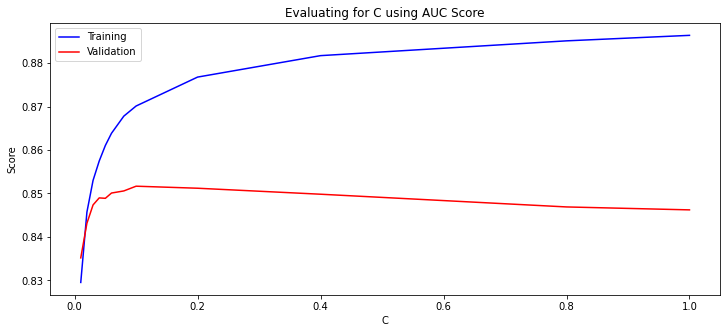

In [8]:
plt.figure(figsize=(12,5))
plt.title("Evaluating for C using AUC Score",
          fontsize=12)


ax = plt.gca()

plt.xlabel("C")
plt.ylabel("Score")


mean_test_AUC = []
mean_train_AUC = []

plt.plot(C, auc_train_C, color = 'blue', label = 'Training')
plt.plot(C, auc_test_C, color = 'red', label = 'Validation')


plt.legend(loc="best")
plt.grid(False)
plt.show()

**We see that the the AUC Score increases rapidly with a small increase in C, but starts decreasing with further increase in C, representing overfitting. We observe that a C value of 0.04 will be the best hyperparameter for our model**

**Training the model based on the chosen parameters**

In [ ]:
svx = LinearSVC(C = 0.04, dual = False, max_iter = 10000)

In [ ]:
svc.fit(X_train, y_train)

In [28]:
y1 = svc.predict(X_train)

In [29]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score,  precision_score, recall_score

**Evaluating the results based on training data**

In [30]:
print(f'Accuracy : {accuracy_score(y_train, y1)}')
print(f'AUC Score : {roc_auc_score(y_train, y1)}')
print(f'F1 Score : {f1_score(y_train, y1)}')
print(f'Precision : {precision_score(y_train, y1)}')
print(f'Recall : {recall_score(y_train, y1)}')

Accuracy : 0.8636079545454546
AUC Score : 0.8574606419262684
F1 Score : 0.8301312670275625
Precision : 0.8347683768590337
Recall : 0.8255453905700211


**Evaluating the results based on validation data**

In [32]:
y2 = svc.predict(X_val)

In [33]:
print(f'Accuracy : {accuracy_score(y_val, y2)}')
print(f'AUC Score : {roc_auc_score(y_val, y2)}')
print(f'F1 Score : {f1_score(y_val, y2)}')
print(f'Precision : {precision_score(y_val, y2)}')
print(f'Recall : {recall_score(y_val, y2)}')

Accuracy : 0.8543181818181819
AUC Score : 0.8489809103628887
F1 Score : 0.822240709927898
Precision : 0.8256752993595099
Recall : 0.8188345760839547


**Comparing the Training and Validation Results**

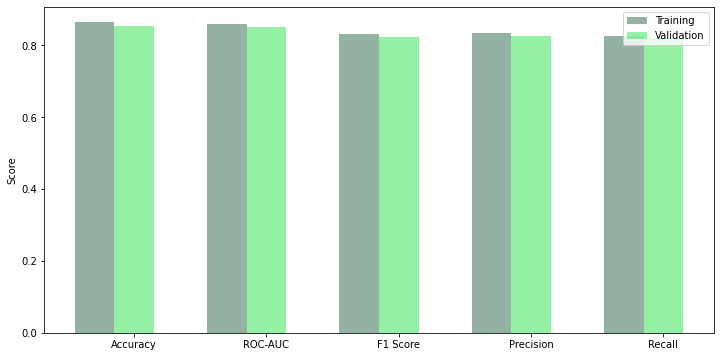

In [40]:
plt.figure(figsize=(12,6))
barWidth = 0.3

bars1 = [accuracy_score(y_train, y1), roc_auc_score(y_train, y1), f1_score(y_train, y1), precision_score(y_train, y1), recall_score(y_train, y1)]
bars2 = [accuracy_score(y_val, y2), roc_auc_score(y_val, y2), f1_score(y_val, y2), precision_score(y_val, y2), recall_score(y_val, y2)]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.5,0.4,0.6), capsize=7, label='Training')
 
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.9,0.4,0.6), capsize=7, label='Validation')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Accuracy', 'ROC-AUC', 'F1 Score', 'Precision', 'Recall'])
plt.ylabel('Score')
plt.legend(loc = 'best')
 
plt.show()


**Saving the trained SVM Model**

In [39]:
import joblib
joblib.dump(svc, 'svc.pkl', compress=1) 

['svc.pkl']